# Дескриптивні статистики

### конспект заняття
### Москанова Ольга

## 1. Теоретична складова (15 хв)

Нехай маємо вибірку $X=(X_1,\dots,X_n)$.
Для неї розглянемо наступні описові характеристики:

1. Вибіркове середнє

$\mu = \overline{X} = \frac{1}{n} \sum_{j=1}^n X_j$

2. Середнє геометричне

$GM = \left(\Pi_{j=1}^n X_j\right)^1/n$

3. середнє гармонійне

$HM = \frac{n}{\sum_{j=1}^n X_j^{-1}}$

4. медіана

$med = X_{m},\quad n=2m$

$med = \frac{X_m+X_{m+1}}{2},\quad n=2m+1$

5. середина діапазону

$\mu_d = \frac{\min (X)+\max (X)}{2}$

6. ширина діапазону
$l_d = \max (X)-\min (X)$

7. інтерквартильний розмах

$IQR = Q_3 - Q_1$

8. дисперсія

    7.1. зміщена
    
    $s^2 = \frac{1}{n} \sum_{j=1}^n (X_j - \overline{X})^2$

    7.2. незміщена
    
    $\sigma^2 = \frac{1}{n-1} \sum_{j=1}^n (X_j - \overline{X})^2$

9. середньоквадратичне відхилення

$s = \sqrt{s^2}, \quad \sigma = \sqrt{\sigma^2}$

10. коефіцієнт варіації

$CV = \frac{\sigma}{\overline{X}}$

## 2. Вправи на папері (30 хв)

З перевіркою на Python. На даному етапі студенти коду не бачать.

### Обчислити:
* вибіркове середнє
* середнє геометричне
* середнє гармонійне
* медіану
* середину діапазону
* дисперсію. довести незміщеність однієї з оцінок
* середньоквадратичне відхилення
* інтерквартильний розмах
* ширину діапазону
* коефіцієнт варіації

Обчислення відбуваються таким чином:
для першого рядка таблиці нижче викладач показує формулу
і підставляє числа разом зі студентами, для другого
викладач просить записати і порахувати когось зі студентів

#### Дані:

Місто | Ахмедабад | Делі | Ченнаї | Колката | Мумбаї | Хайдарабад | Каннур
----- | --------- | ---- | ------ | ------- | ------ | ---------- | -----
McDonalds | 200.00 | 250.00 | 250.00 | 300.00 | 289.50 | 300.00 | 250.00
Молоко 1gln | 195.53 | 187.99 | 178.47 | 151.13 | 205.85 | 185.31 | 151.42



In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# initialize data
mac_prices  = np.array([200.,    250.,   250.,   300.,   289.5, 300.,   250])
milk_prices = np.array([195.53, 187.99, 178.47, 151.13, 205.85, 185.31, 151.42])

#### Вибіркове середнє

$ \overline{mac prices} = \frac{200+250*3+289.5+300*2}{7} = 262.7857 $

$ \overline{milk prices} = \frac{195.53+187.99+178.47+151.13+205.85+185.31+151.42}{7} = 179.3857 $

In [4]:
# calculate mean

mac_prices.mean(), milk_prices.mean()

(262.7857142857143, 179.3857142857143)

#### Середнє геометричне

$ GM(macprices) = \sqrt[7]{200\cdot 250^3\cdot 289.5\cdot 300^2} = 260.5075 $

$ GM(milkprices) = \sqrt[7]{195.53\cdot 187.99\cdot 178.47\cdot 151.13\cdot 205.85\cdot 185.31\cdot 151.42} = 178.2905 $

In [8]:
# calculate GM

np.exp(np.log(mac_prices).mean()), np.exp(np.log(milk_prices).mean())

(260.5074555462135, 178.29047671382088)

#### Середнє гармонійне

$ HM(macprices) = \frac{7}{\frac{1}{200}+\frac{3}{250}+\frac{1}{289.5}+\frac{2}{300}} = 258.1035 $

$ HM(milkprices) = \frac{7}{\frac{1}{195.53}+\frac{1}{187.99}+\frac{1}{178.47}+\frac{1}{151.13}+\frac{1}{205.85}+\frac{1}{185.31}+\frac{1}{151.42}} = 177.1607 $

In [10]:
# calculate HM

mac_prices.shape[0] / (1/mac_prices).sum(), milk_prices.shape[0] /(1/milk_prices).sum()

(258.10354709291215, 177.16067077413314)

#### Ранжирований ряд:

range    |   1   |   2   |   3   |  4  |   5   |   6   |   7
---------- | ----- | ----- | ----- | --- | ----- | ----- | -----
mac_prices | 200.0 | 250.0 | 250.0 | 250 | 289.5 | 300.0 | 300.0
milk_prices| 151.13 | 151.42 | 178.47 | 185.31 | 187.99 | 195.53 | 205.85

In [20]:
# get sorted range

mac_prices_sorted  = np.sort(mac_prices)
milk_prices_sorted = np.sort(milk_prices)

#### Медіана

med(mac_prices)  = 250

med(milk_prices) = 185.31

In [23]:
# calculate median

np.median(mac_prices_sorted), np.median(milk_prices_sorted)

(250.0, 185.31)

#### Середина діапазону

Вибірка | Середина діапазону
------- | ------------------
mac_prices | 250
milk_prices | 178.49

In [25]:
# calculate midrange

(np.max(mac_prices)+np.min(mac_prices))/2, (np.max(milk_prices)+np.min(milk_prices))/2

(250.0, 178.49)

#### Дисперсія

##### Незміщеність дисперсії:
$$
\begin{align}
\mathbb{E}[\widehat{\sigma}^2]
& = \mathbb E\left[ \frac 1{N-1} \sum_{i=1}^N \left(x_i - \frac 1N \sum_{j=1}^N x_j \right)^2 \right] \\
& = \frac 1{N-1} \sum_{i=1}^N \mathbb E\left[ x_i^2 - \frac 2N x_i \sum_{j=1}^N x_j + \frac{1}{N^2} \sum_{j=1}^N x_j \sum_{k=1}^N x_k \right] \\
& = \frac 1{N-1} \sum_{i=1}^N \left[ \frac{N-2}{N} \mathbb E[x_i^2] - \frac 2N \sum_{j \neq i}  \mathbb E[x_i x_j] + \frac{1}{N^2} \sum_{j=1}^N \sum_{k \neq j} \mathbb E[x_j x_k] +\frac{1}{N^2} \sum_{j=1}^N \mathbb E[x_j^2] \right] \\
& = \frac 1{N-1} \sum_{i=1}^N \left[ \frac{N-2}{N} (\sigma^2+\mu^2) - \frac 2N (N-1) \mu^2 + \frac{1}{N^2} N (N-1) \mu^2 + \frac {1}{N} (\sigma^2+\mu^2) \right] \\
& = \sigma^2.
\end{align}
$$

##### Вибіркова дисперсія:

$ S^2(mac prices) = \frac{(200-262.7857)^2+3*(250-262.7857)^2+(289.5-262.7857)^2+2*(300-262.7857)^2}{7} = 1130.847 $

$ S^2(milk prices) = \frac{(151.13-179.3857)^2+(151.42-179.3857)^2+(178.47-179.3857)^2+(185.31-179.3857)^2+(187.99-179.3857)^2+(195.53-179.3857)^2+(205.85-179.3857)^2}{7} = 378.7761 $

##### Виправлена дисперсія:

$ S_0^2(mac prices) = \frac{(200-262.7857)^2+3*(250-262.7857)^2+(289.5-262.7857)^2+2*(300-262.7857)^2}{6} = 1319.321 $

$ S^2(milk prices) = \frac{(151.13-179.3857)^2+(151.42-179.3857)^2+(178.47-179.3857)^2+(185.31-179.3857)^2+(187.99-179.3857)^2+(195.53-179.3857)^2+(205.85-179.3857)^2}{6} = 441.9054 $

In [26]:
# calculate variance

np.var(mac_prices), np.var(milk_prices)

(1130.8469387755104, 378.77605306122456)

In [30]:
n1 = mac_prices.shape[0]
n2 = milk_prices.shape[0]

var1 = np.var(mac_prices)*n1/(n1-1)
var2 = np.var(milk_prices)*n2/(n2-1)

var1, var2

(1319.3214285714287, 441.9053952380953)

#### Середньоквадратичне відхилення

##### Відхилення:

$ S(macprices) = \sqrt{1130.847} = 33.62807 $

$ S(milkprices) = \sqrt{378.7761} = 19.46217 $

##### Виправлене відхилення:

$ S_0(macprices) = \sqrt{1319.321} = 36.32246 $

$ S_0(milkprices) = \sqrt{378.7761} = 21.02155 $

In [32]:
# calculate standard deviation

sd_mac  = var1 ** 0.5
sd_milk = var2 ** 0.5

sd_mac, sd_milk

(36.32246451676192, 21.021545976404667)

### IQR


range    |   1   |   2   |   3   |  4  |   5   |   6   |   7
---------- | ----- | ----- | ----- | --- | ----- | ----- | -----
mac_prices | 200.0 | __250.0__ | 250.0 | __250__ | 289.5 | __300.0__ | 300.0
milk_prices| 151.13 | __151.42__ | 178.47 | __185.31__ | 187.99 | __195.53__ | 205.85

IQR(mac_prices) = 300 - 250 = 50

IQR(milk_prices) = 195.53 - 151.42 = 44.11

##### З урахуванням медіани:

IQR(mac_prices) = $ \frac{300+289.5}{2} - 250  = 44.75 $

IQR(milk_prices) = $ \frac{195.53 + 187.99}{2} - \frac{151.42 + 178.47}{2} = 26.815 $

In [34]:
# calculate IQR

q1 = np.quantile(mac_prices_sorted, [0.25,0.75])
q2 = np.quantile(milk_prices_sorted, [0.25,0.75])

q1[1] - q1[0], q2[1] - q2[0]

(44.75, 26.814999999999998)

#### Ширина діапазону

Вибірка | Ширина діапазону
------- | ------------------
mac_prices | 100
milk_prices | 54.72

In [36]:
# calculate range width

(np.max(mac_prices)-np.min(mac_prices)), (np.max(milk_prices)-np.min(milk_prices))

(100.0, 54.72)

#### Variation coefficient

$ CV(mac prices) = \frac{S(mac prices)}{\overline{mac prices}} = \frac{33.62807}{262.7857} = 0.1279677 $

$ CV(milk prices) = \frac{S(milk prices)}{\overline{mac prices}} = \frac{19.46217}{179.3857} = 0.1084934 $

##### З виправленим відхиленням:

$ CV_0(mac prices) = \frac{S_0(mac_prices)}{\overline{mac prices}} = \frac{36.32246}{262.7857} = 0.1382208 $

$ CV_0(milk prices) = \frac{S_0(milk_prices)}{\overline{mac prices}} = \frac{21.02155}{179.3857} = 0.1171863 $

In [38]:
# calculate relative standard deviation (RSD) (CV)

sd_mac/np.mean(mac_prices), sd_milk/np.mean(milk_prices)

(0.1382208489357616, 0.1171862879946107)

## 2. Вправи на Python (40 хв)

1. Для датасета __slv__ порахувати на Python:

* вибіркове середнє
* середнє геометричне
* середнє гармонійне
* медіану
* середину діапазону
* дисперсію
* середньоквадратичне відхилення
* інтерквартильний розмах
* ширину діапазону
* коефіцієнт варіації

In [50]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
slv = iris[iris["species"] == "versicolor"]["sepal_length"].to_numpy()
slv

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7])

In [55]:
# mean
np.mean(slv)

5.936

In [56]:
# geom mean
np.exp(np.log(slv).mean())

5.913979361310534

In [57]:
# harmonic mean
slv.shape[0] / (1/slv).sum()

5.891935965311545

In [59]:
# median
np.median(slv)

5.9

In [60]:
# mean range
(np.max(slv)+np.min(slv))/2

5.95

In [61]:
# unbiased variance
var = np.var(slv) * slv.shape[0] / (slv.shape[0] - 1)
var

0.2664326530612245

In [62]:
# std dev
var ** 0.5

0.5161711470638634

In [65]:
# IQR
q = np.quantile(slv, [0.25,0.75])
q[1] - q[0]

0.7000000000000002

In [66]:
# range length
slv.max() - slv.min()

2.0999999999999996

In [67]:
# CV
var ** 0.5 / var.mean()

1.9373419178663907

2. Побудувати для __slv__:

* гістограму
* боксплот

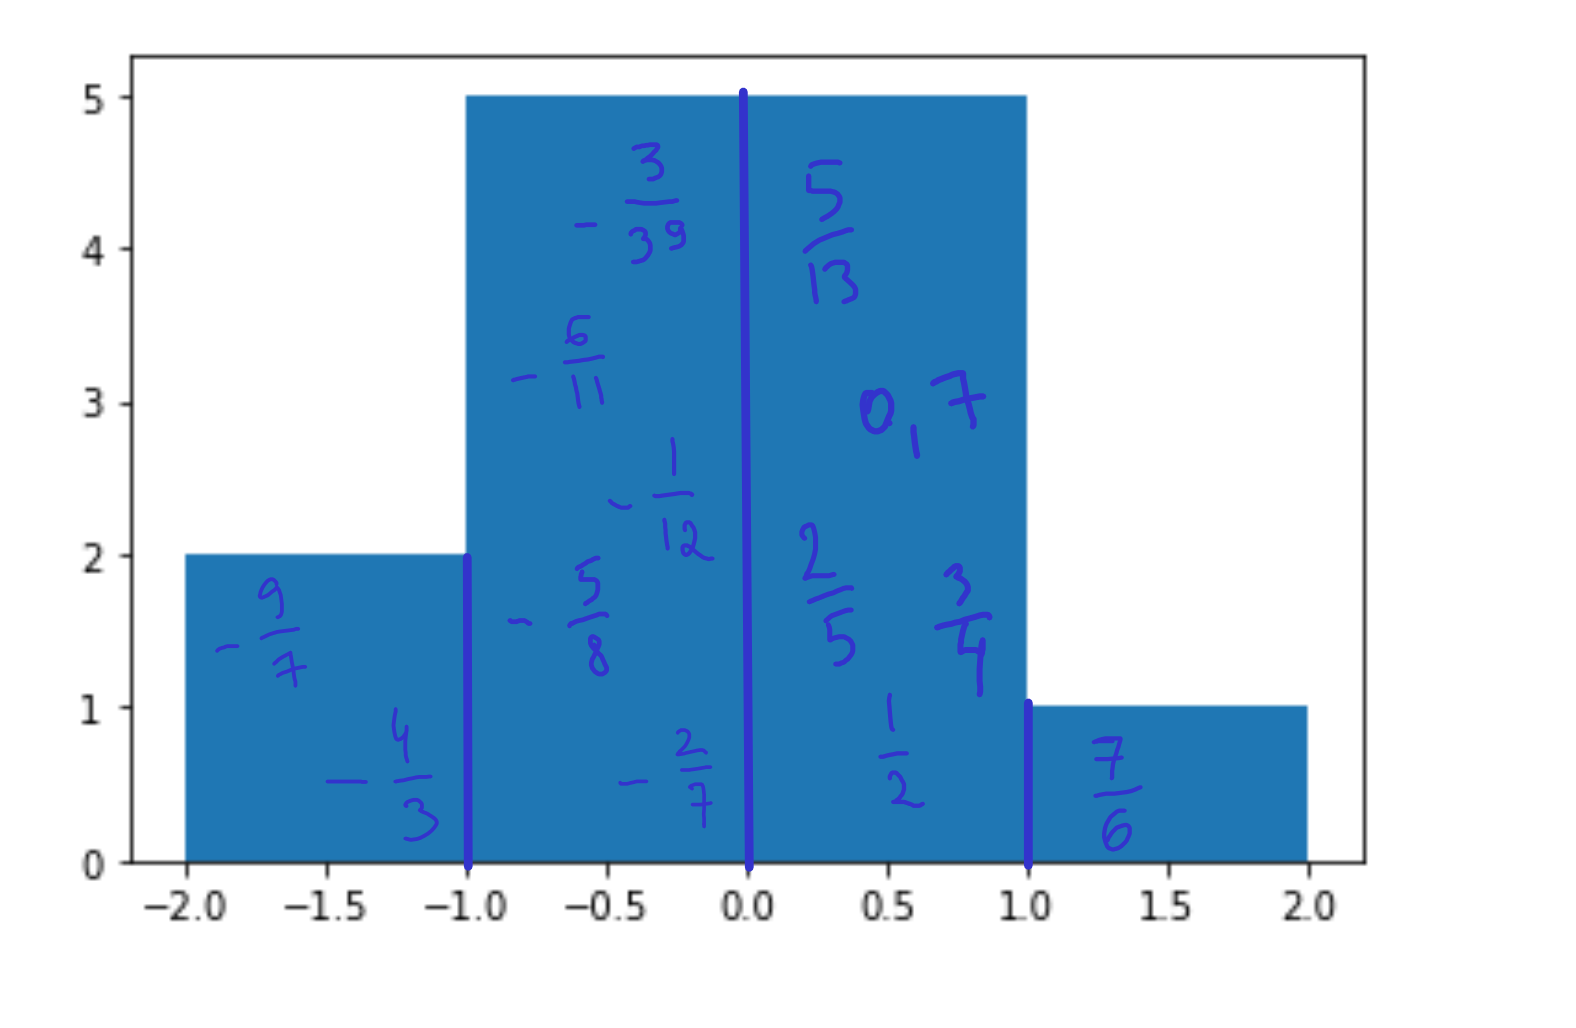

(array([ 4.,  1.,  6., 10.,  5.,  8.,  5.,  3.,  5.,  3.]),
 array([4.9 , 5.11, 5.32, 5.53, 5.74, 5.95, 6.16, 6.37, 6.58, 6.79, 7.  ]),
 <BarContainer object of 10 artists>)

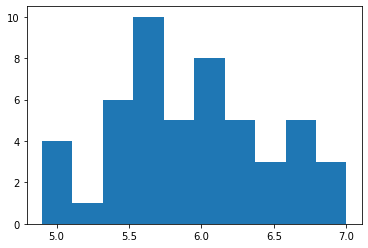

In [87]:
plt.hist(slv)

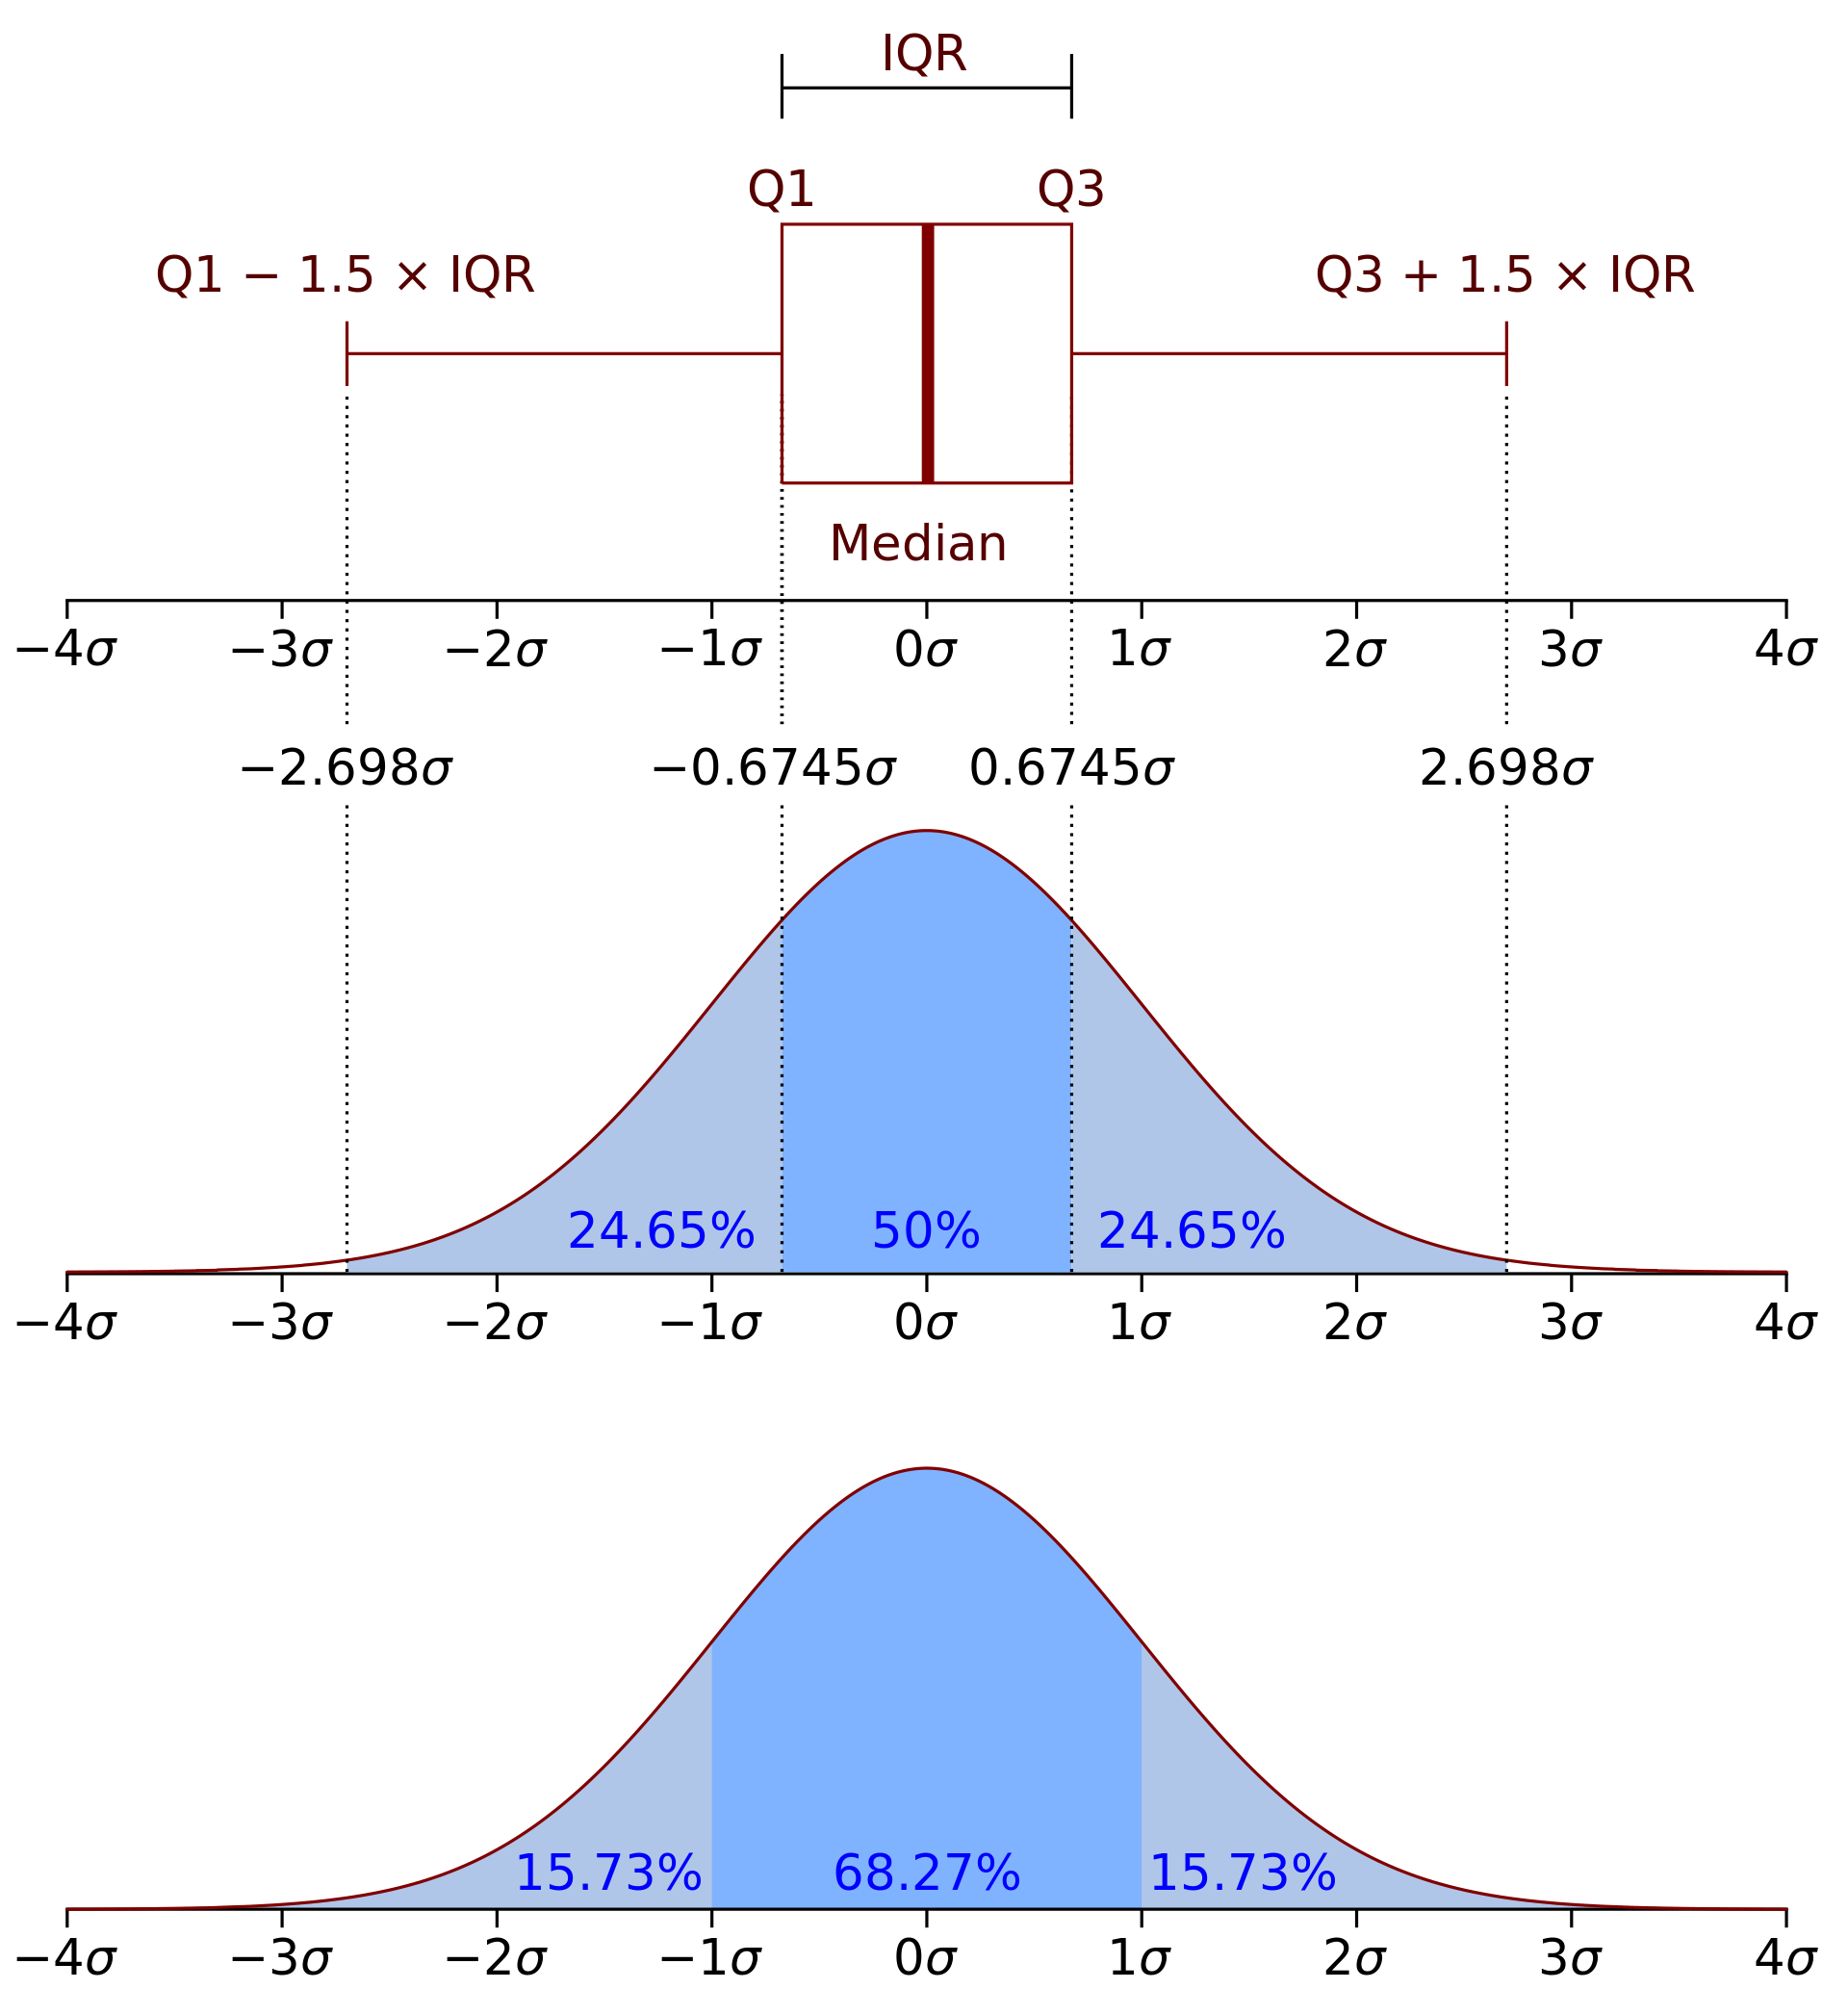

{'whiskers': [<matplotlib.lines.Line2D at 0x7ffb601c5208>,
 'caps': [<matplotlib.lines.Line2D at 0x7ffb601c57b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ffb68232f60>],
 'medians': [<matplotlib.lines.Line2D at 0x7ffb601c5d68>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ffb601d6080>],
 'means': []}

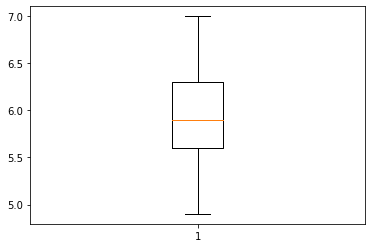

In [68]:
plt.boxplot(slv)

## Домашнє завдання

1. Для вибірки __rand__ порахувати вручну:

* вибіркове середнє
* середнє геометричне
* середнє гармонійне
* медіану
* середину діапазону
* дисперсію
* середньоквадратичне відхилення
* інтерквартильний розмах
* ширину діапазону
* коефіцієнт варіації

Побудувати гістограму з 5 стовпчиків та боксплот вручну

2. Дослідити незміщеність однієї з оцінок на вибір

3. Для вибірки __setosa__ порахувати статистики з п.1 у Python,
   побудувати гістограму, боксплот для однієї змінної.
   Змінні на вибір індивідуально

In [40]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
setosa = iris[iris["species"] == "setosa"]
setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
rand = np.random.randint(low=7, high=42, size=10)
rand

array([ 9, 19, 16, 32, 32, 38, 23, 21, 25,  8])